# Psychoinformatics - Week 13 (Examples)
by Tsung-Ren (Tren) Huang (trhuang@g.ntu.edu.tw)

In [6]:
pip install opencv-python 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 20.9 MB/s eta 0:00:00:00:0100:01


In [7]:
!pip install scikit-image

In [8]:
%config IPCompleter.greedy=True 
%matplotlib inline
import numpy as np, scipy.misc
import cv2
import matplotlib.pyplot as plt


## 1 Basic Imaging Processing

### 1.1 Color to gray images

#### 1.1.1 The Matplot way

(360, 510, 3) <class 'numpy.ndarray'> uint8
(360, 510)


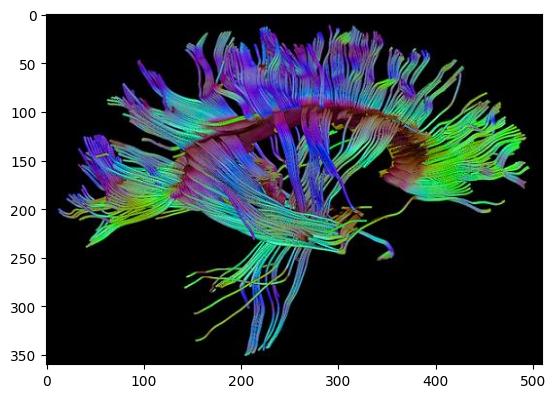

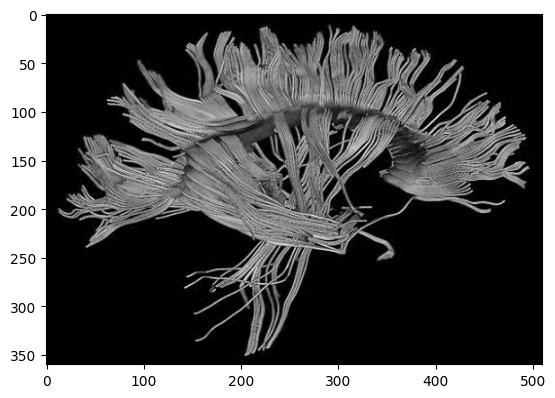

In [3]:
import matplotlib.pyplot as plt
plt.close('all'); img1=plt.imread('DTI.jpg')
print(img1.shape,type(img1),img1.dtype)
plt.imshow(img1); plt.figure()
img2=np.mean(img1,2); print(img2.shape)
plt.imshow(img2,cmap=plt.cm.gray)
plt.imsave('DTI_gray.jpg',img2, cmap=plt.cm.gray)

#### 1.1.1 The PIL/Pillow way

In [4]:
from PIL import Image
img=Image.open('DTI.jpg')
img2=img.convert('L')
img2.show()
img2.save('DTI_gray.jpg')

### 1.2 Image Contrast

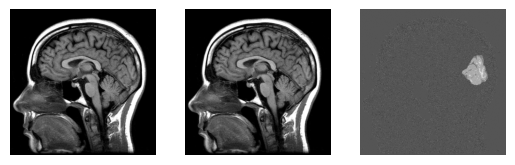

In [5]:
import matplotlib.pyplot as plt
img=[]
img.append(np.float64(plt.imread('MRI1.jpg')))
img.append(np.float64(plt.imread('MRI2.jpg')))
img.append(img[1]-img[0]) #contrast
for i in range(3):
 plt.subplot(1,3,i+1); plt.axis('off')
 plt.imshow(img[i],cmap=plt.cm.gray)

### 1.3 Image Blending & Filtering

#### 1.3.1 The Matplotlib way

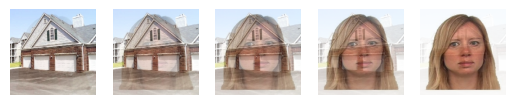

In [6]:
import matplotlib.pyplot as plt
img1=plt.imread('face.jpg') # for FFA
img2=plt.imread('house.jpg') # for PPA
k=np.arange(1,10,2)/10.0
for i in range(5):
    plt.subplot(1,5,i+1);plt.axis('off')
    hybrid=k[i]*img1+(1-k[i])*img2
    plt.imshow(hybrid/255)

#### 1.3.2 The PIL/Pillow way

In [7]:
from PIL import Image
from PIL.ImageFilter import (
   BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE,
   EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN
)
img1=Image.open('house.jpg')
img2=Image.open('face.jpg')
k=np.arange(1,10,2)/10.0
for i in range(5):
    hybrid=Image.blend(img1,img2,k[i])
    hybrid=hybrid.filter(CONTOUR) # Applying a contour filter
    hybrid.show()

### 1.4 Color Maps

#### 1.4.1 Matplotlib (RGB) vs. OpenCV (BGR)

(2, 2, 3)
[[[0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]]]


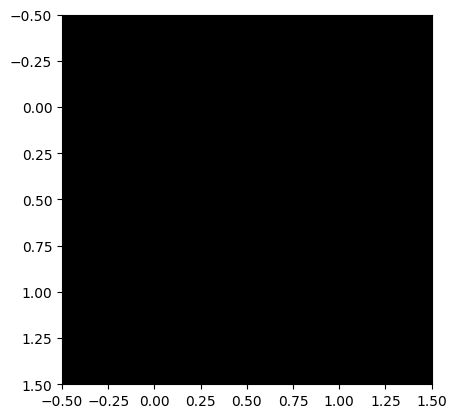

In [8]:
# Use Matplotlib to show an blank image:
img=np.zeros((2,2,3),dtype='uint8')
print(img.shape)
print(img)
plt.imshow(img);

[[[255   0   0]
  [  0 255   0]]

 [[  0   0 255]
  [  0   0   0]]]


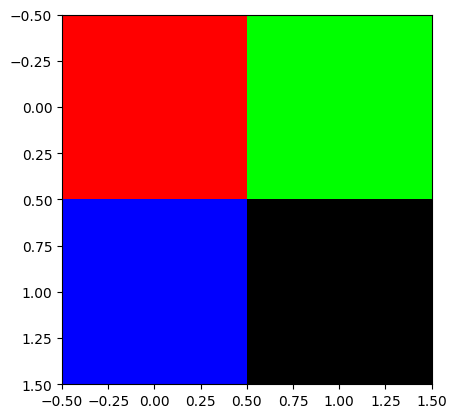

In [9]:
# Manipulate the RGB values of a pixel:
img2=img.copy()
img2[0,0,0],img2[0,1,1],img2[1,0,2]=[255,255,255]
print(img2)
plt.imshow(img2);

In [10]:
# Try OpenCV, which uses the order of BGR rather than RGB:
#!pip install opencv-python
import cv2
cv2.startWindowThread()
cv2.imshow('Test',img2)
cv2.waitKey(5000);
cv2.destroyAllWindows()

#### 1.4.2 From files

In [11]:
# Download the girl!
import urllib.request
urllib.request.urlretrieve('http://mil.psy.ntu.edu.tw/~tren/girl.jpg','girl.jpg')
img3=cv2.imread('girl.jpg')
print(img3.shape)

(300, 300, 3)


In [12]:
# Show me the girl by OpenCV
cv2.imshow('Test',img3)
cv2.waitKey(5000);
cv2.destroyAllWindows()

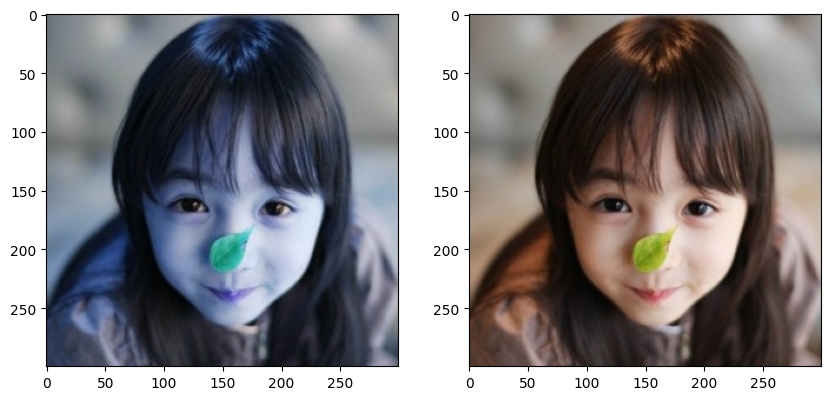

In [13]:
# Show me the girl by Matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); plt.imshow(img3)
plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB));

(300, 300)


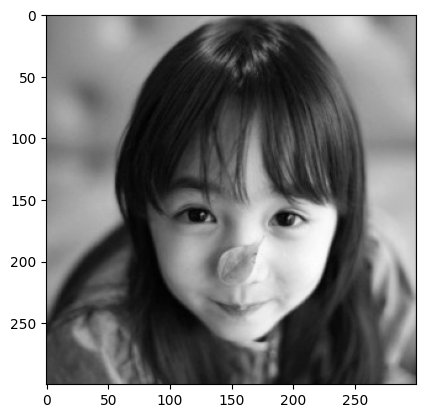

In [14]:
img3_gray=cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
print(img3_gray.shape)
cv2.imwrite('girl_gray.jpg',img3_gray)
plt.imshow(img3_gray,cmap='gray');

### 1.5 2D Spatial Filtering/Convolution

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]]


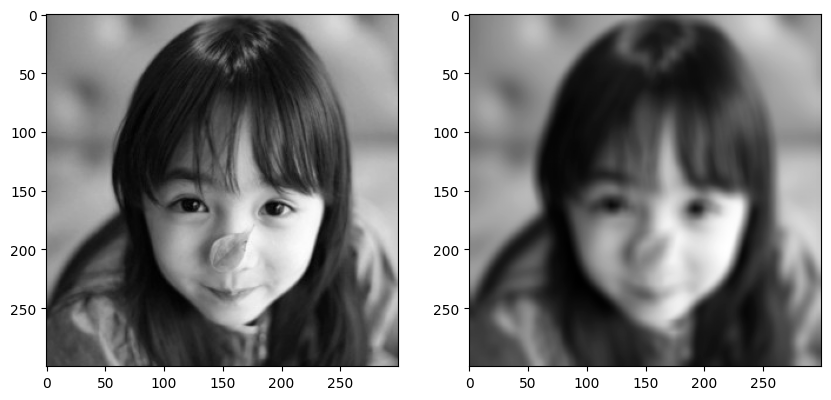

In [15]:
kernel1=np.ones((10,10),np.float32)/100
print(kernel1)
img3_gray_smooth=cv2.filter2D(img3_gray,-1,kernel1)
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); plt.imshow(img3_gray,cmap='gray');
plt.subplot(1,2,2); plt.imshow(img3_gray_smooth,cmap='gray');

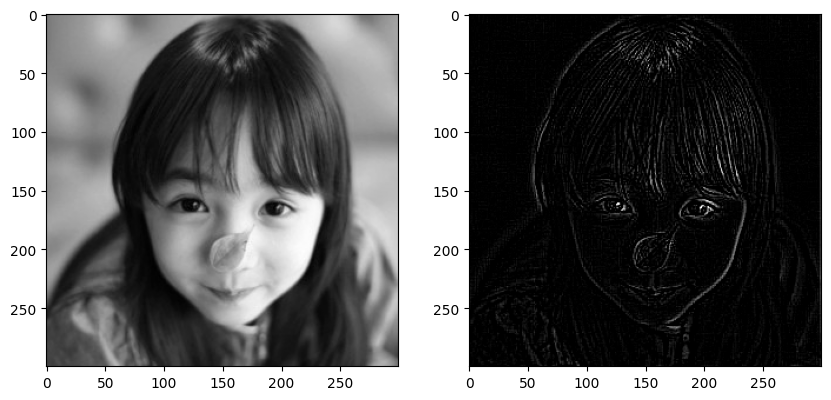

In [16]:
# LGN cells: on-center off-surround RF
kernel2=np.array([[-1,-1,-1],
                  [-1,8,-1],
                  [-1,-1,-1]])
img3_gray_LGN=cv2.filter2D(img3_gray,-1,kernel2)
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); plt.imshow(img3_gray,cmap='gray')
plt.subplot(1,2,2); plt.imshow(img3_gray_LGN,cmap='gray');

### 1.6 Down-sampling

#### 1.6.1 Image pyramid (w/ Gaussian smoothing)
<img src="https://www.pyimagesearch.com/wp-content/uploads/2015/03/pyramid_example.png">

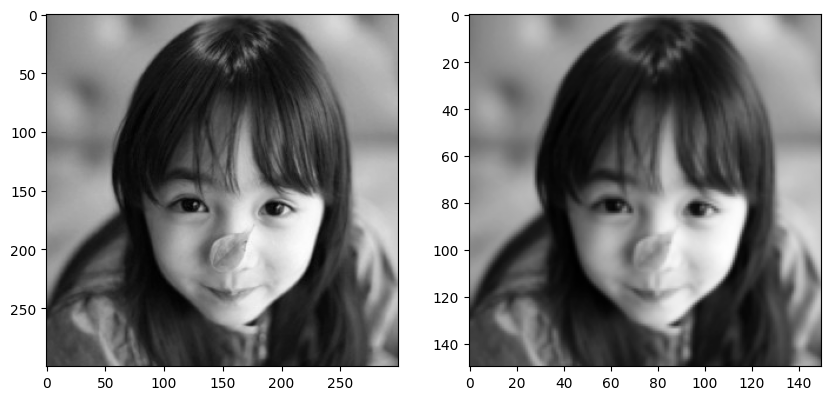

In [17]:
img3_gray_small=cv2.pyrDown(img3_gray)
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); plt.imshow(img3_gray,cmap='gray')
plt.subplot(1,2,2); plt.imshow(img3_gray_small,cmap='gray');

### 1.6.2 Max pooling
<img src="https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png" width=50%>

In [20]:
import skimage.measure

a = np.array([
      [ 12,  20, 30,  0],
      [  8,  12,  2,  0],
      [ 34,  70, 37,  4],
      [112, 100, 25, 12]])

skimage.measure.block_reduce(a, (2,2), np.max)

array([[ 20,  30],
       [112,  37]])

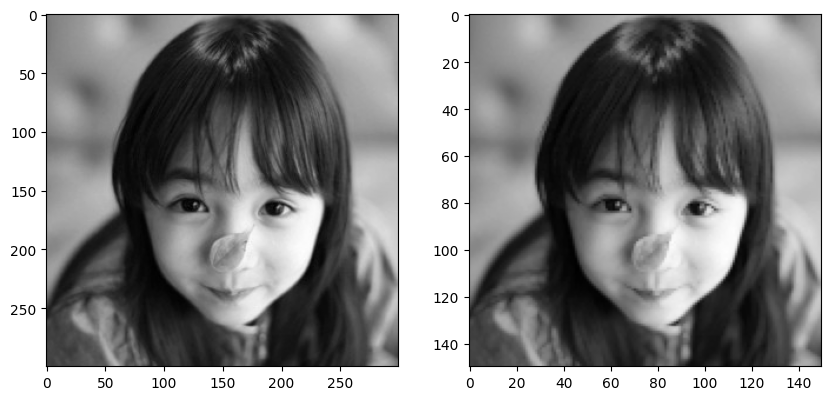

In [21]:
img3_gray_maxpooled=skimage.measure.block_reduce(img3_gray, (2,2), np.max)
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); plt.imshow(img3_gray,cmap='gray')
plt.subplot(1,2,2); plt.imshow(img3_gray_maxpooled,cmap='gray');

## 2 Traditional Computer Vision

### 2.1 Face Detection

#### 2.1.1 Basic detection using Haar Cascades

[[ 69 100 175 175]]


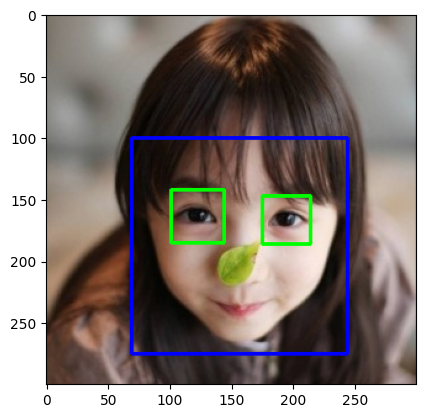

In [22]:
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml','haarcascade_frontalface_default.xml')
urllib.request.urlretrieve('https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml','haarcascade_eye.xml')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(img3_gray)
print(faces) # (x,y, width, height)
for (x,y,w,h) in faces:
    cv2.rectangle(img3,(x,y),(x+w,y+h),(255,0,0),2) # face bounding box
    roi_gray = img3_gray[y:y+h, x:x+w]
    roi_color = img3[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) # eye bounding box
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB));

#### 2.1.2 Facial landmarks using Dlib

In [3]:
! pip install cmake dlib

  Using cached dlib-20.0.0.tar.gz (3.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 MB 2.3 MB/s eta 0:00:0000:0100:01m
  error: subprocess-exited-with-error
  
  × Building wheel for dlib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [225 lines of output]
      running bdist_wheel
      running build
      running build_ext
      Building extension for Python 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 11:23:37) [Clang 14.0.6 ]
      Invoking CMake setup: 'cmake /private/var/folders/h9/j1vxmfws2j7fwyk50qcc3bt00000gn/T/pip-install-7obhxhbh/dlib_008350e72991449999f296f36aaef3a9/tools/python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=/private/var/folders/h9/j1vxmfws2j7fwyk50qcc3bt00000gn/T/pip-install-7obhxhbh/dlib_008350e72991449999f296f36aaef3a9/build/lib.macosx-11.1-arm64-cpython-313 -DPYTHON_EXECUTABLE=/opt/anaconda

In [ ]:
import dlib, urllib.request, cv2
model="shape_predictor_68_face_landmarks.dat"
urllib.request.urlretrieve('https://github.com/italojs/facial-landmarks-recognition/raw/master/shape_predictor_68_face_landmarks.dat',model)
img3=cv2.imread('girl.jpg')
detector=dlib.get_frontal_face_detector()
poses=dlib.shape_predictor(model)
#win=dlib.image_window()
detected_faces=detector(img3)
print("Found {} faces in the image".format(len(detected_faces)))
#win.set_image(img3)
for i, rect in enumerate(detected_faces):
    print("Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i,rect.left(),rect.top(),rect.right(),rect.bottom()))
    #win.add_overlay(rect)
    landmarks=poses(img3,rect)
    print("{} landmarks found".format(landmarks.num_parts))
    #win.add_overlay(landmarks)

ModuleNotFoundError: No module named 'dlib'

In [42]:
#Visualize the 68 facial landmarks
for n in range(0, 68):
    x = landmarks.part(n).x
    y = landmarks.part(n).y
    print(n,x,y)
    cv2.circle(img3, (x, y), 4, (255, 0, 0), -1)
    
cv2.imshow("Image", img3)
cv2.waitKey(5000)

0 78 154
1 79 174
2 82 194
3 89 212
4 99 229
5 112 242
6 126 255
7 140 266
8 155 269
9 169 266
10 182 255
11 197 244
12 212 231
13 222 214
14 228 196
15 233 177
16 236 157
17 89 149
18 100 137
19 117 133
20 134 134
21 150 140
22 175 141
23 190 134
24 206 133
25 221 138
26 229 151
27 160 160
28 159 170
29 158 180
30 158 190
31 141 207
32 148 207
33 156 208
34 163 207
35 171 207
36 107 164
37 117 159
38 129 159
39 137 168
40 128 170
41 116 169
42 180 169
43 189 160
44 200 160
45 208 166
46 201 171
47 189 172
48 132 234
49 142 233
50 150 229
51 155 231
52 159 229
53 169 233
54 181 233
55 171 240
56 161 243
57 156 244
58 151 243
59 143 241
60 136 235
61 150 236
62 155 236
63 159 236
64 177 235
65 161 236
66 157 236
67 151 235


-1

### 2.2 Facial Emotion Recognition
With facial landmarks, you can then <a href="https://theonly1.tistory.com/106">recognize facial emotions</a>.

### 2.3 Object Detection

#### 2.3.1 Haar Cascades
You can either <a href="https://www.instructables.com/id/Create-OpenCV-Image-Classifiers-Using-Python/">train your own object detection model using Haar Cascades</a> or Google a model like "haarcascade car .xml".

## 3 DL-based Computer Vision

## 3.0  The CIFAR-10 dataset

<img src="http://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png" width=50%>

In [ ]:
pip install 

In [2]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 749.4 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 94.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 125.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 109.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.3 MB/s eta 0:00:00


In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(set(y_train[:,0]),set(y_test[:,0]))
classes=['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
{np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)} {np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)}


x_train	：50,000 張訓練圖片，每張是 32×32 像素的 RGB 彩色圖片（3個通道）
y_train	：50,000 個訓練標籤，每個標籤是 0 到 9 之間的整數
x_test	：10,000 張測試圖片，每張是 32×32 像素的 RGB 彩色圖片（3個通道）
y_test	：10,000 個測試標籤，每個標籤是 0 到 9 之間的整數

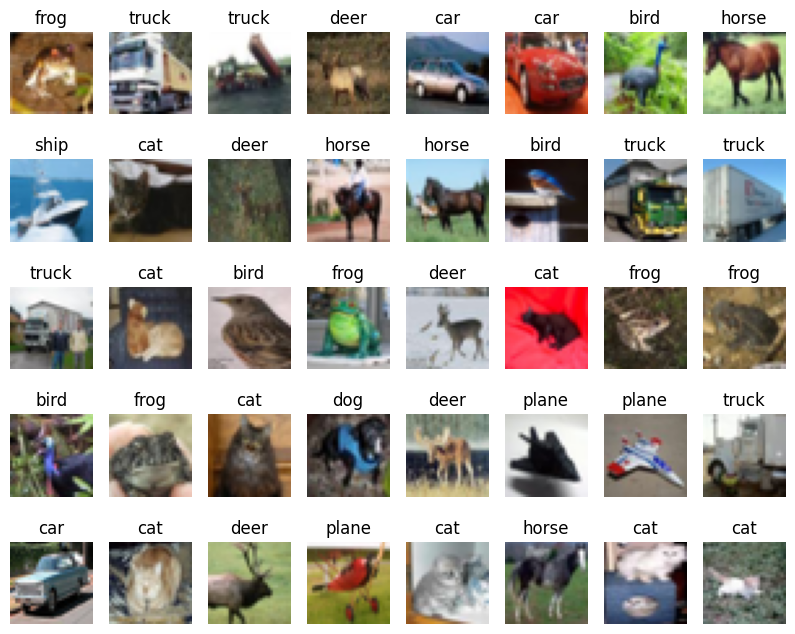

In [9]:
plt.figure(figsize=(10, 8))
for i in range(40):
    plt.subplot(5,8,i+1);
    plt.imshow(x_train[i]); 
    plt.title(classes[y_train[i,0]]); 
    plt.axis('off')

### 3.1 LeNet
<img src="https://4.bp.blogspot.com/-Xc-1oK8cPHs/WS4aYCpsnSI/AAAAAAAADdU/jOARrMWGj3gs_pAXU-C4ryAFa8C_CuBfACLcB/s1600/fig_1_3_LeCun.png">

什麼是 LeNet？
由 Yann LeCun 在 1998 年提出
是歷史上第一個成功的 CNN
原本用於手寫數字辨識（郵遞區號）
這裡用來辨識 CIFAR-10 的 10 個類別

In [45]:
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(6, (5, 5), padding='valid', activation = 'relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(16, (5, 5), padding='valid', activation = 'relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation = 'relu'))
model.add(Dense(84, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
opt=keras.optimizers.RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

print(model.summary())

Metal device set to: Apple M2


2023-11-30 19:10:34.269131: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-30 19:10:34.269215: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

/Users/tren/miniconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


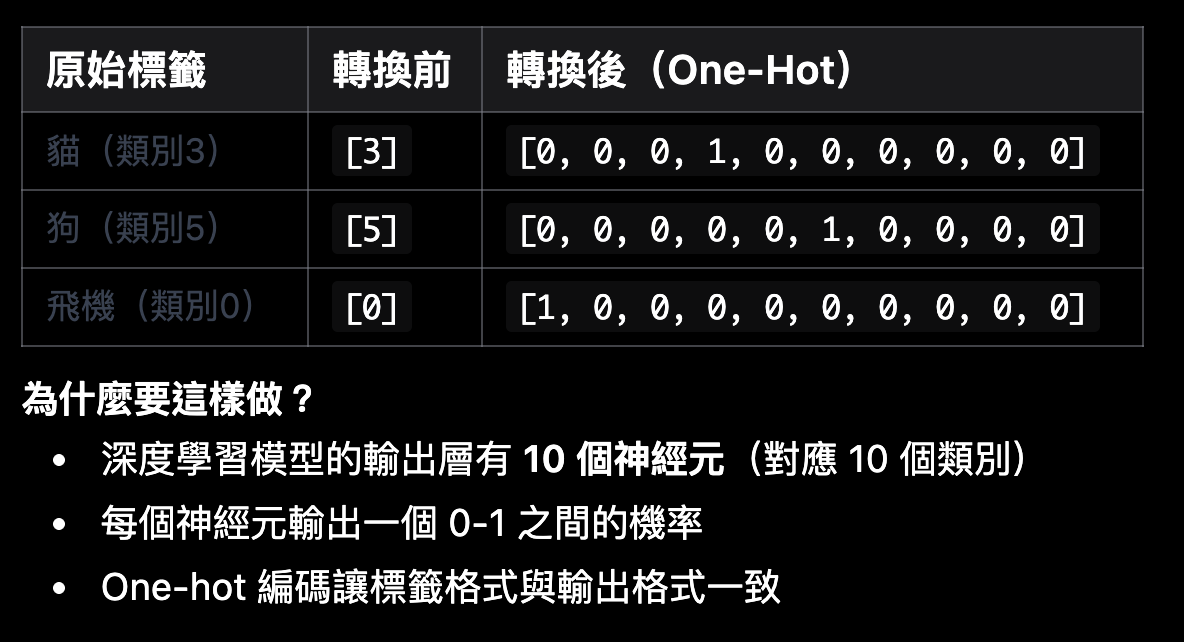

In [ ]:
# load & preprocess data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
# 作用： 將類別標籤轉換為 one-hot 編碼格式
x_train = x_train.astype('float32') #神經網路需要浮點數進行運算
x_test = x_test.astype('float32')
x_train /= 255.0 # 正規化（Normalization）
x_test /= 255.0

# Training:
model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), shuffle=True)
# batch_size=128 每次訓練使用 128 張圖片
# epochs=50 整個訓練集跑 50 次
# validation_data=(x_test, y_test) 使用測試集來評估模型表現
# shuffle=True 每次訓練前打亂資料
    # Epoch 1: 飛機、狗、汽車、貓、船、青蛙、鹿...（隨機順序）
    # Epoch 2: 貓、飛機、馬、船、狗、汽車、青蛙...（重新打亂）
    # 模型學習到真正的特徵，不會記住順序！✅
    
# save the model
model.save('lenet_cifar10.h5')

Epoch 1/50


2023-11-30 19:10:39.778083: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-11-30 19:10:40.119285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 1.8314 - accuracy: 0.3416

2023-11-30 19:10:48.690427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 9s 18ms/step - loss: 1.8314 - accuracy: 0.3416 - val_loss: 1.6690 - val_accuracy: 0.3945
Epoch 2/50
391/391 [==============================] - 7s 17ms/step - loss: 1.5217 - accuracy: 0.4568 - val_loss: 1.4650 - val_accuracy: 0.4597
Epoch 3/50
391/391 [==============================] - 6s 16ms/step - loss: 1.3963 - accuracy: 0.5012 - val_loss: 1.3879 - val_accuracy: 0.4969
Epoch 4/50
391/391 [==============================] - 6s 16ms/step - loss: 1.3063 - accuracy: 0.5346 - val_loss: 1.2942 - val_accuracy: 0.5409
Epoch 5/50
391/391 [==============================] - 6s 17ms/step - loss: 1.2423 - accuracy: 0.5596 - val_loss: 1.2257 - val_accuracy: 0.5649
Epoch 6/50
391/391 [==============================] - 7s 17ms/step - loss: 1.1882 - accuracy: 0.5779 - val_loss: 1.2311 - val_accuracy: 0.5655
Epoch 7/50
391/391 [==============================] - 7s 17ms/step - loss: 1.1416 - accuracy: 0.5951 - val_loss: 1.1700 - val_accuracy: 0.5847
Epoch 8/50

In [19]:
# load a pre-trained model:
#model=keras.models.load_model('lenet_cifar10.h5')

# Testing (on the training data):
Ypred=model.predict(x_train[0:2])
print(Ypred,'\n','-'*30,'\n',y_train[0:2],'\n','-'*30)
print(np.argmax(Ypred,axis=1),np.argmax(y_train[0:2],axis=1))

1/1 [==============================] - 0s 15ms/step
[[1.50220847e-09 2.94123748e-09 2.65846252e-01 5.34515828e-02
  3.89661873e-03 4.09123838e-01 1.64645851e-01 1.03035875e-01
  1.66924785e-08 3.11101878e-09]
 [1.71565290e-07 7.26400051e-11 2.21236974e-07 2.59575250e-10
  6.34708073e-08 1.72152813e-11 9.39991661e-12 4.83263740e-09
  1.27423434e-07 9.99999404e-01]] 
 ------------------------------ 
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] 
 ------------------------------
[5 9] [6 9]


### 3.2 Advanced CNNs
Check out more pre-trained models on https://keras.io/applications/

In [21]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')

print(model.summary())

102967424/102967424 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

#### 3.3 Object detection
Please try YOLOv1~v6 by yourself.